## Vector data - regridding

This section introduces more ways to style your vactor data, including adding colours and legends.

### Example: Wind from Storm Ophelia (October 2017)

In this example, we will use sample wind data from Storm Ophelia, which impacted the UK in October 2017.

In [8]:
import earthkit as ek

data = ek.data.from_source("sample", "storm_ophelia_wind_850.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,850,20171016,0,0,an,0,regular_ll
1,ecmf,v,isobaricInhPa,850,20171016,0,0,an,0,regular_ll


### Passing a `Style`

We can plot our vector field with a `Style`, much like we can for contour and raster fields. This allows us to pass colour schemes, levels and units to apply to our vector fields.

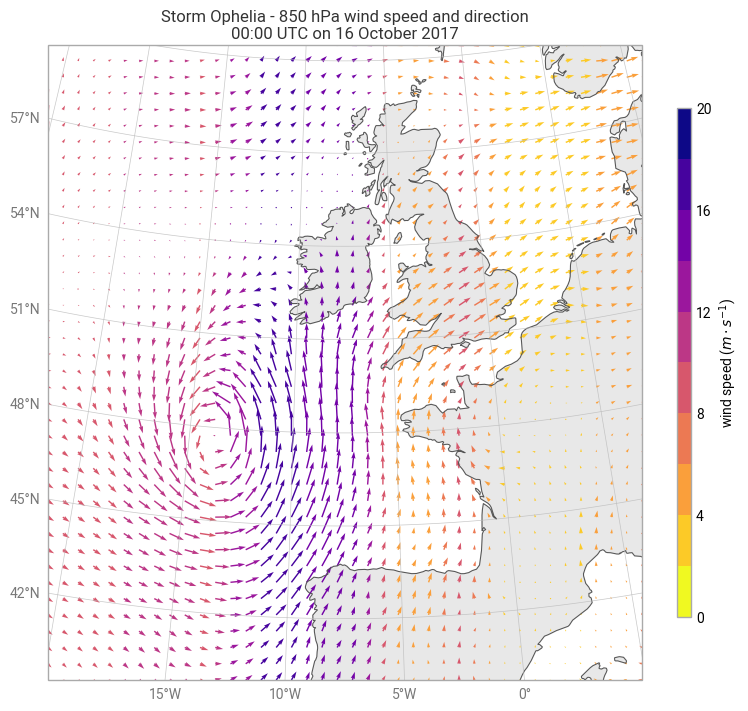

In [9]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

style = ek.plots.styles.Style(
    colors="plasma_r",
    levels=range(0, 22, 2),
    units="m s-1",
)

chart.quiver(data, style=style)
chart.legend(label="wind speed ({units})", location="right")

chart.land()
chart.coastlines()
chart.gridlines()

chart.title(
    "Storm Ophelia - {level} hPa wind speed and direction\n"
    "{time:%H:%M UTC on %-d %B %Y}"
)

chart.show()

Styles can also be created from a dictionary, which can be easier to handle from higher level configurations. Note how the resample options are passed in a dictionary fashion instead of the usual class creation.

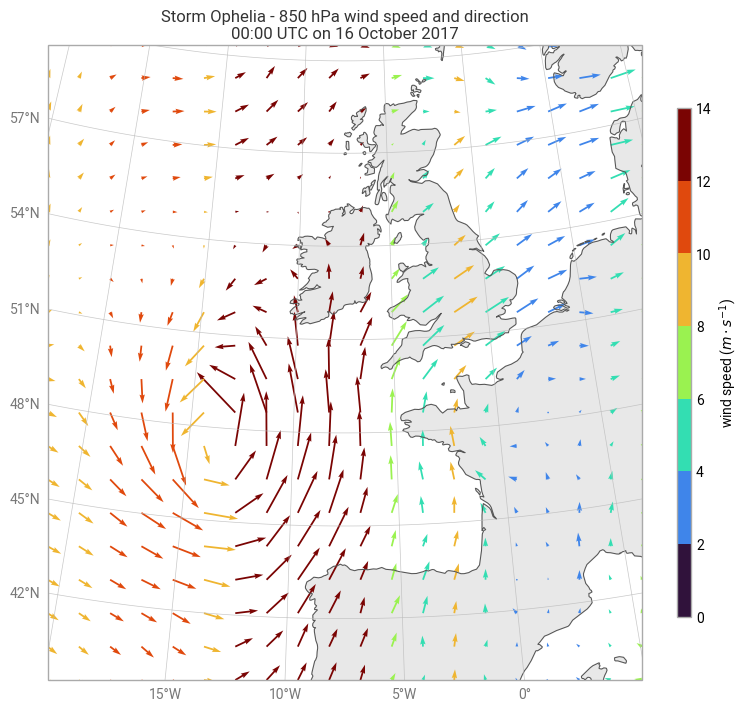

In [13]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

style_options = {
    "type": "Style",
    "colors": "turbo",
    "levels": "range(0, 16, 2)",
    "units": "m s-1",
    "resample": {
        "resample_type": "regrid",
        "n": 20
    }
}

style = ek.plots.styles.Style.from_dict(style_options)

chart.quiver(data, style=style)
chart.legend(label="wind speed ({units})", location="right")

chart.land()
chart.coastlines()
chart.gridlines()

chart.title(
    "Storm Ophelia - {level} hPa wind speed and direction\n"
    "{time:%H:%M UTC on %-d %B %Y}"
)

chart.show()